In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

#### 7.1. Load Preprocessed Datasets

We load the preprocessed datasets generated in the previous step.  
At this stage, low-variance features and irrelevant statistical features have already been removed, so the dataset now contains a refined set of predictors suitable for model-based feature importance estimation.

In [2]:
df_train = pd.read_parquet("./data/6/df_train.parquet")
df_test = pd.read_parquet("./data/6/df_test.parquet")
df_val = pd.read_parquet("./data/6/df_val.parquet")

#### 7.2. Prepare Features and Target

We separate the target (`isFraud`) from the feature matrix.  
Tree-based models such as ExtraTrees can naturally handle heterogeneous numerical distributions and do not require scaling, making them a strong choice for feature importance analysis.

In [3]:
X_train, y_train = df_train.drop(columns="isFraud"), df_train["isFraud"]

#### 7.3. Train ExtraTreesClassifier for Feature Importance

We train an `ExtraTreesClassifier` with:
- **200 trees** for stability,
- **randomized splits** for robustness,
- **parallel processing** (`n_jobs = -1`) for efficiency.

ExtraTrees is well-suited for tabular data and provides reliable feature importance scores based on impurity reduction.

In [4]:
model = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False).reset_index(drop=True)

#### 7.4. Visualizing Feature Importances

We plot the feature importances in descending order.  
A horizontal bar chart is used because feature names may be long and this layout improves readability.

Each bar is annotated with its exact importance score, and the x-axis is extended slightly (15%) to avoid text overlap.  
This visualization highlights which features contribute the most to fraud detection.

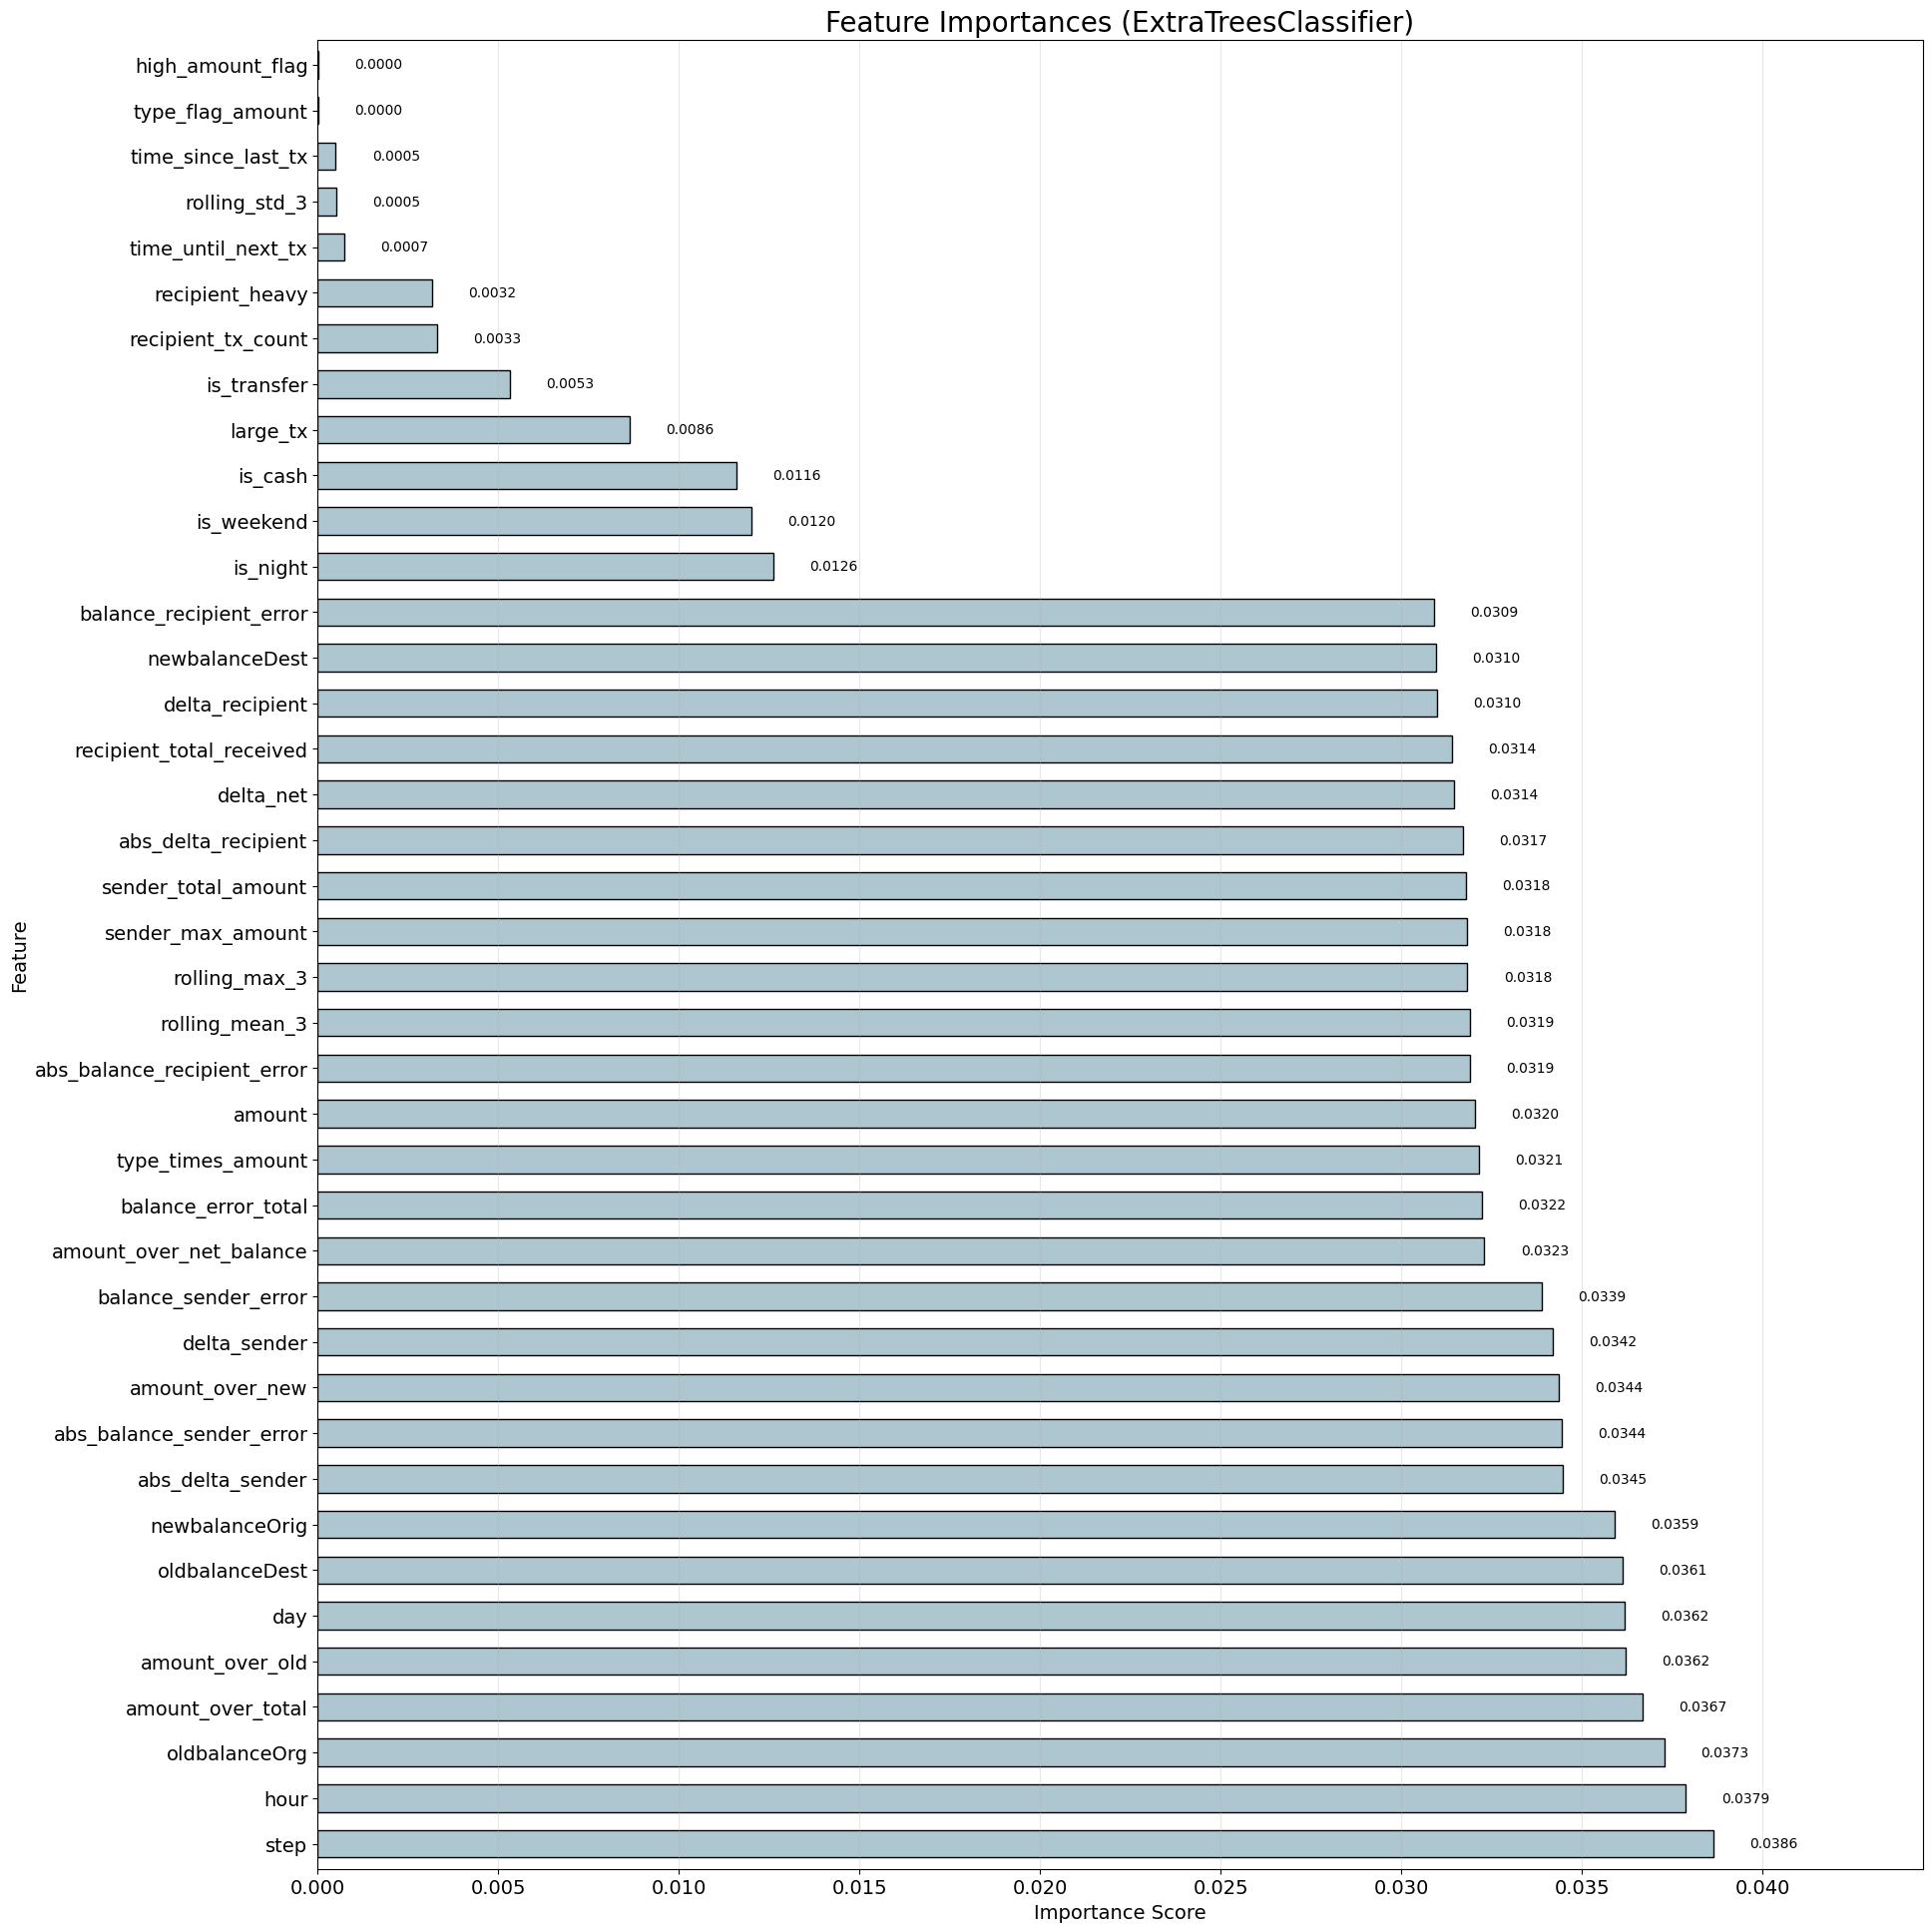

In [5]:
fig, ax = plt.subplots(figsize=(20, len(feature_importances)*0.5))

feature_importances.plot(
    x="Feature",
    y="Importance",
    kind="barh",
    color="#AEC6CF",
    legend=False,
    width=0.6,
    fontsize=14,
    edgecolor="black",
    ax=ax
)

plt.xlim(0, feature_importances["Importance"].max() * 1.15)

for i, val in enumerate(feature_importances["Importance"]):
    ax.text(val + 0.001, i, f"{val:.4f}", fontsize=10, va="center")

plt.title("Feature Importances (ExtraTreesClassifier)", fontsize=20)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout(pad=3.0)
plt.grid(axis="x", alpha=0.3)
plt.show()

#### 7.5. Save Processed Datasets

We export the updated datasets into a new directory (`./data/7/`).  
This keeps a clear versioned structure across preprocessing steps and ensures consistency for downstream notebooks.

In [6]:
os.makedirs("./data/7/", exist_ok=True)

df_train.to_parquet("./data/7/df_train.parquet", index=False)
df_val.to_parquet("./data/7/df_val.parquet", index=False)
df_test.to_parquet("./data/7/df_test.parquet", index=False)